In [1]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
imp.reload(CalcABA);
import plotting_ABA_Diewertje as pltABA
imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
import read_model_ID;
imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
imp.reload(plt_F)


import analysis_SA_fits_Diewertje as SAfits
imp.reload(SAfits);



In [16]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,25):
    sa = pd.read_csv('../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_' +str(sim)+'.txt', delimiter='\t', index_col=43)
    filename = '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_3.txt'

In [3]:
print('The chi-squared of the best fit is:',chi_squared[3-1])

The chi-squared of the best fit is: 63191.2355044


In [4]:
# Load data
import Prepare_data_Simple as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
rawABA

# prepare data
import Prepare_data_Simple as pre
xdata,ydata,yerr=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')


In [5]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

ontarget ABA is: 2.3337872101643824
[2.44453015 1.69525922 2.25158078 2.34228443 2.10057533 2.36683352
 2.2202968  1.27590257 1.87116477 0.98152055 0.93478991 0.73503649
 0.66221779 0.70177018 0.64389561 0.51623349 0.41891278 0.35052609
 0.39271724 0.18657149]


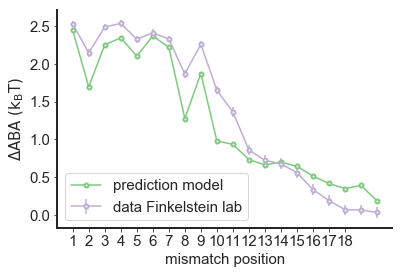

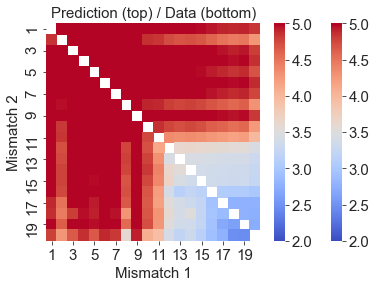

In [6]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'fixed_rates'

plt.figure()
_ = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


plt.figure()
best_heatmap = pltABA.predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

# Cannot do those plots, because do not have block data
# plt.figure()
# _ = pltABA.predict_1D_mmblocks(Param_normal, model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
# plt.figure()
# _ = pltABA.predict_block_mismatches(Param_normal, model_id, T,guide_length, show_plot=True, show_data=True, data_file=rawABA)



C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


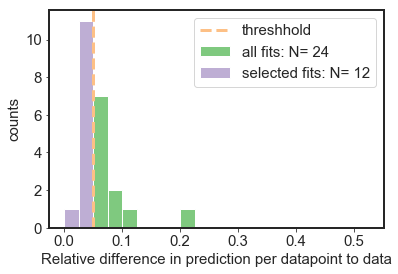

In [43]:
# This does exactly the same as above! To get scores
selected_sims, selected_scores, scores = SAfits.select_on_prediction(simset3, 
                                                         chi_squared, 
                                                         percentage=0.05,
                                                         Nparams=41,
                                                         model_id='fixed_rates',
                                                         precalculated=False, 
                                                         score=None,
                                                         save_scores=False, 
                                                         filename='../data/25_10_2018/select_with_predcitions.txt'
                                                         ) # do not use filename now

plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.025), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.025), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.05, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint to data', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

# Still old way of selecting: based on the best fit.
# Not based on data

In [ ]:
# --- make selection --- 
simset3 = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,41,'fixed_rates')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

In [ ]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


In [17]:
# select based on dataset instead of best fit:
selected_sims, selected_scores, scores = SAfits.select_on_prediction_WA(simset3,
                                                                        percentage=0.02,
                                                                        model_id='fixed_rates',
                                                                        Nparams=41,
                                                                        path='../Data_ABA_Finkelsteinlab/',
                                                                        replica='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
# replica is filename of the data in my case!

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


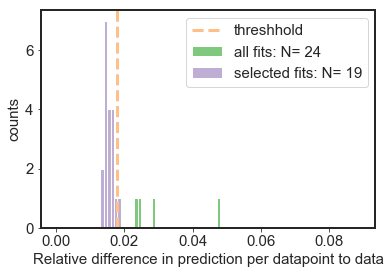

In [18]:
plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.001), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.001), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.018, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint to data', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

In [19]:
# --- make selection --- 
simset3 = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,41,'fixed_rates')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

PAM    3.500000
1     -9.044989
2      0.935116
3      3.934130
4     -1.926849
5      2.233372
6      0.804803
7     -4.977109
8      1.115378
9      1.983498
10     4.862030
11     1.106711
12    -0.880561
13    -0.723693
14    -3.006419
15     4.709174
16     0.838832
17    -9.109057
18     7.313689
19     2.595916
20     2.349659
Name: ../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_3.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


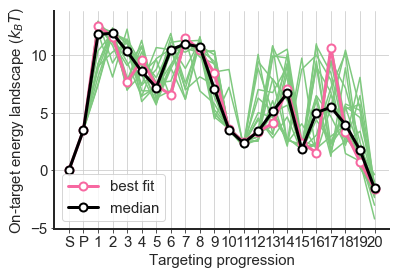

In [20]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


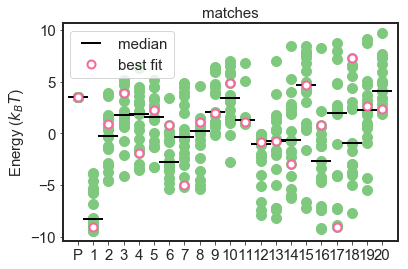

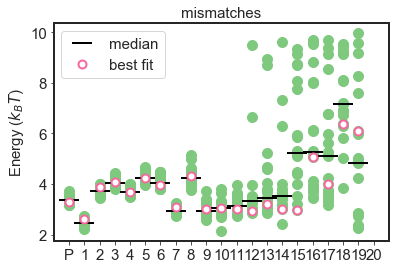

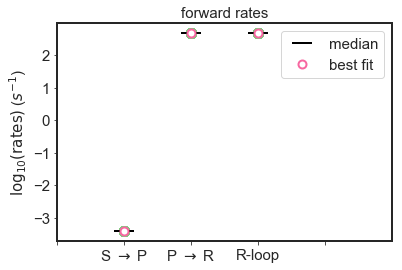

In [21]:
# ---- show fluctuations in parameter sets --- 
# THIS IS THE RESULT

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)
plt.figure()
for sim in simset3:
    matches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

matches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    

matches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('matches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);

# --- Mismatches --- 
plt.figure()
for sim in simset3:
    mismatches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

mismatches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    

mismatches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('mismatches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


# --- 10log of the forward rates --- 
plt.figure()
for sim in simset3:
    forward_rates.loc[sim].apply(np.log10).plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

forward_rates.median().apply(np.log10).plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    
    

forward_rates.loc[best_fit_conc3].apply(np.log10).plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('forward rates',fontsize=15)
plt.xticks(range(-1,4),['',r'S $\rightarrow$ P',r'P $\rightarrow$ R','R-loop',''],fontsize=15);
plt.xlim(-1,4);
plt.yticks(fontsize=15);
plt.ylabel(r'$\log_{10}(\rm{rates})$ ($s^{-1}$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);




# To compare with Boyle e-mailed file + rates

In [11]:
# To load other paramter sets, to choose one with low Ksp, to see if that will give a good fit.
import plotting_Boyle_Diewertje as plt_B
model_id = 'general_energies_no_kPR'
# filename = simset[np.argsort(chi_squared)[3]]
filename = np.array(['../data/22_3_2019/fit_22_3_2019_sim_4.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_5.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_6.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_7.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_9.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_13.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_17.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_21.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_26.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_31.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_33.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_35.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_47.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_49.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_50.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_51.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_53.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_54.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_56.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_59.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_63.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_67.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_68.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_69.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_79.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_80.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_82.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_83.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_87.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_90.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_97.txt'])
Nparams = 43
ref_Ksp=10000 # just a big number
for i in range(0,len(filename)):
    p= plt_B.load_simm_anneal(filename[i], Nparams)
    Ksp=10**p[-2]/10
    if(Ksp<ref_Ksp):
        ref_Ksp=Ksp
        parameters=p
        name=filename[i]


In [12]:
parameters

array([ 1.31214478, -4.92140591, -2.10218068, -0.18192779,  3.00443021,
        0.30892862,  0.61072301, -3.42722194, -0.22804118,  2.88044723,
        3.79010583,  1.68223951,  0.19994353, -3.75444207,  1.64436202,
        0.83696531,  4.18563129, -6.16944491,  1.54538327,  4.71917344,
        3.43627495,  7.90585782,  4.63181573,  8.8367947 ,  7.59691064,
        5.79252277,  3.87074744,  6.21139636,  4.73913461,  7.61361343,
        5.65230693,  5.53077871,  4.42004506,  4.52243087,  5.04953077,
        4.34747733,  4.13999552,  8.78379747,  2.97480171,  7.75991109,
        2.50910811, -2.40958204,  2.67370734])

In [13]:
# first run the cell before!!!
parameters
rates=parameters[-2].copy()
rates=rates-1
parameters[-2]=rates
parameters
epsilonPAM=parameters[0].copy()
epsilonPAM=epsilonPAM+np.log(10)
parameters[0]=epsilonPAM
parameters

array([ 3.61472987, -4.92140591, -2.10218068, -0.18192779,  3.00443021,
        0.30892862,  0.61072301, -3.42722194, -0.22804118,  2.88044723,
        3.79010583,  1.68223951,  0.19994353, -3.75444207,  1.64436202,
        0.83696531,  4.18563129, -6.16944491,  1.54538327,  4.71917344,
        3.43627495,  7.90585782,  4.63181573,  8.8367947 ,  7.59691064,
        5.79252277,  3.87074744,  6.21139636,  4.73913461,  7.61361343,
        5.65230693,  5.53077871,  4.42004506,  4.52243087,  5.04953077,
        4.34747733,  4.13999552,  8.78379747,  2.97480171,  7.75991109,
        2.50910811, -3.40958204,  2.67370734])

In [14]:
len(parameters)

43

In [15]:
# to get chi-squared for Boyle
import Chisq_Finkelstein as chin
chi_BoyleR=[]
for i in range(0,len(xdata)):
    chi_BoyleR.append(chin.calc_Chi_square(parameters,xdata[i],ydata[i],yerr[i],
                                concentrations, reference=1, 
                                ontarget_ABA=42,guide_length=20,
                                model_id='general_energies_no_kPR'))

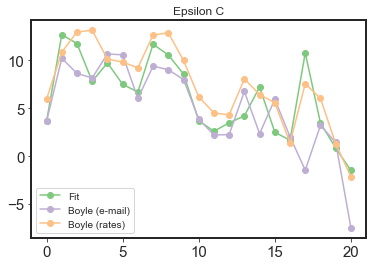

In [16]:
# to plot boyle in this graph
Param_Boyle=np.loadtxt('parameters_Boyle.txt')
epsC = np.array(Param_Boyle[:21].copy())
epsC[0]+=np.log(10)
epsC[1:] *= -1

epsCr = np.array(parameters[:21].copy())
epsCr[0]+=np.log(10)
epsCr[1:] *= -1

epsC_fit=np.array(Param_conc3[:21]).copy()
epsC_fit[0]=epsC[0]
epsC_fit[1:] *= -1


plt.plot(range(0,21),np.cumsum(epsC_fit),marker='o',label='Fit')
plt.plot(range(0,21),np.cumsum(epsC),marker='o',label='Boyle (e-mail)')
plt.plot(range(0,21),np.cumsum(epsCr),marker='o',label='Boyle (rates)')
plt.title('Epsilon C')
plt.legend()

In [17]:
# to get chi-squared for Boyle
import Chisq_Finkelstein as chin
chi_Boyle=[]
for i in range(0,len(xdata)):
    chi_Boyle.append(chin.calc_Chi_square(Param_Boyle,xdata[i],ydata[i],yerr[i],
                                concentrations, reference=1, 
                                ontarget_ABA=42,guide_length=20,
                                model_id='init_limit_general_energies_v2'))
print('The chi-squared of Boyle is: ',np.sum(chi_Boyle))

The chi-squared of Boyle is:  18618338.7961834


In [18]:
print('The chi-squared of the best fit is:',chi_squared[3-1])
print('The chi-squared of Boyle (e-mailed) is: ',np.sum(chi_Boyle))
print('The chi-squared of Boyle from rates is:',np.sum(chi_BoyleR) )

The chi-squared of the best fit is: 63191.2355044
The chi-squared of Boyle (e-mailed) is:  18618338.7961834
The chi-squared of Boyle from rates is: 3103103.7572128526


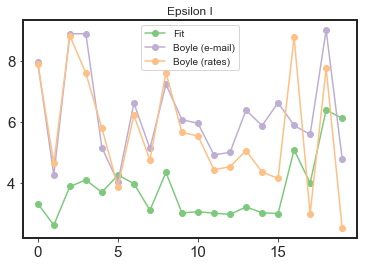

In [19]:
plt.plot(range(0,20),Param_conc3[21:],marker='o',label='Fit')
plt.plot(range(0,20),Param_Boyle[21:41],marker='o',label='Boyle (e-mail)')
plt.plot(range(0,20),parameters[21:41],marker='o',label='Boyle (rates)')
plt.title('Epsilon I')
plt.legend()

# Try prediction of on target for all boyle parameters

In [20]:
# To load other paramter sets, to choose one with low Ksp, to see if that will give a good fit.
import plotting_Boyle_Diewertje as plt_B
import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
model_id = 'general_energies_no_kPR'
filename = np.array(['../data/22_3_2019/fit_22_3_2019_sim_4.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_5.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_6.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_7.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_9.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_13.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_17.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_21.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_26.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_31.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_33.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_35.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_47.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_49.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_50.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_51.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_53.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_54.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_56.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_59.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_63.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_67.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_68.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_69.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_79.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_80.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_82.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_83.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_87.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_90.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_97.txt'])
Nparams = 43
ref_Ksp=10000 # just a big number
ontarget_ABA=[]
for i in range(0,len(filename)):
    parameters= plt_B.load_simm_anneal(filename[i], Nparams)
    concentrations=np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 10 
    ontarget_ABA.append(CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                         mismatch_positions=[],model_id=model_id,
                                         guide_length=20,T=60 * 10))
    

In [21]:
ontarget_ABA

[1.0941036568737603,
 1.0614145833465125,
 1.0444135256841038,
 1.0523200714810819,
 1.0966984682249354,
 1.0594435795606414,
 1.0867901234052004,
 1.1058118681010431,
 1.0832849818617527,
 1.0941445266685912,
 1.1202139436877916,
 1.0685710068927465,
 1.0985125057391574,
 1.0810824394819485,
 1.0728621209657865,
 1.0399806346816003,
 1.084314398609941,
 1.038574996932758,
 1.1033271825498756,
 1.0699674207583685,
 1.0700294801794024,
 1.0522784268280747,
 1.0891568709416493,
 1.0884229439487172,
 1.0640551163444072,
 1.0542615040413514,
 1.0577656272140834,
 1.0624989365083015,
 1.0565557233673821,
 1.0366238465267084,
 1.0707477285684763]

# Analyse best fits

ontarget ABA is: 2.4289037377096467
[2.3545762  1.57902031 2.14203497 2.22921982 2.0071145  2.25104659
 2.06192508 1.25667732 1.79862643 0.82842825 0.86731343 0.67555009
 0.59314884 0.6166318  0.5319905  0.44044814 0.34622984 0.29374211
 0.29427429 0.12217267]
ontarget ABA is: 2.3337872121616563
[2.44453015 1.69525922 2.25158078 2.34228443 2.10057533 2.36683352
 2.22029679 1.27590256 1.87116477 0.98152055 0.93478991 0.73503649
 0.66221779 0.70177017 0.64389561 0.5162335  0.41891278 0.35052609
 0.39271724 0.18657149]
ontarget ABA is: 2.1533266738333716
[2.55726236 1.89648588 2.45546587 2.49393535 2.2835778  2.52884626
 2.37650063 1.44709751 2.04128024 1.1483431  1.12337565 0.92349033
 0.86126615 0.87556349 0.80332639 0.64704681 0.66146903 0.51945735
 0.51421622 0.30587818]
ontarget ABA is: 2.15358772555895
[2.57772234 1.89930615 2.42546406 2.53467404 2.28601053 2.52203408
 2.37151133 1.46994563 2.03897154 1.10562556 1.14026731 0.91566921
 0.88018352 0.87444967 0.78049631 0.6948383  0.56

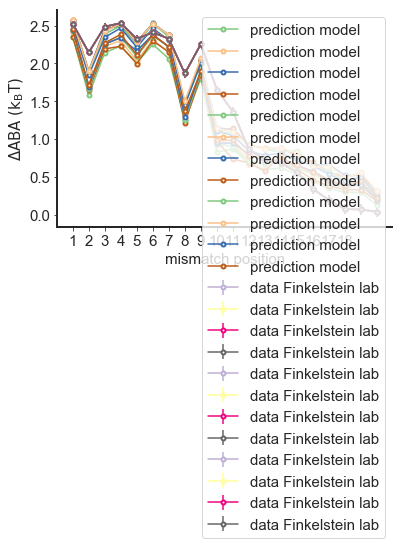

In [22]:
plt.figure()
Nparams=41
model_id='fixed_rates'
for filename in selected_sims:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    _ = pltS.predict_single_mm(parameters,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

# Compare best fit to not selecte fits

In [23]:
selected_sims

array(['../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_1.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_3.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_5.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_7.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_8.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_14.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_16.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_18.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_19.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_21.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_22.txt',
       '../Diew

In [24]:
best_fit_conc3

'../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_3.txt'

In [25]:
simset3[8:13]

array(['../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_19.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_21.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_22.txt',
       '../Diewertje/2_5_2019_fixedrates_conc3/fit_2_5_2019_fixedrates_conc3_sim_24.txt'],
      dtype='<U79')

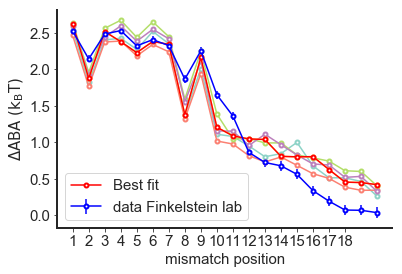

In [32]:
plt.figure()
Nparams=41
model_id='fixed_rates'
# First run the make simset again at the top!!!!!
not_selected=simset3[8:13]

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(not_selected))] 
count=0 

for filename in not_selected:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    #_ = pltS.predict_single_mm(parameters,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                        mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T,
                                                       ontarget_ABA=ontarget_ABA)
    
    ax = plt.plot(range(1, guide_length + 1),
                  delta_ABA,
                  marker='o',
                  markersize=4,
                  markerfacecolor='white',
                  markeredgewidth=2,
                  linestyle='solid',
                  c=colors[count])

    sns.despine()
    plt.xticks(range(1, 19), fontsize=15);
    plt.yticks(fontsize=15);
    plt.xlabel('mismatch position', fontsize=15);
    plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
    count=count+1

# to plot the best if tin the same graph
parameters = plt_B.load_simm_anneal(filename, Nparams)
#_ = pltS.predict_single_mm(parameters,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
reference_conc = 1 #10
ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                mismatch_positions=[],
                                model_id=model_id,
                                guide_length=20,
                                T=60 * 10)

delta_ABA = np.zeros(guide_length)
for mm_pos in range(1, guide_length + 1):
    delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                    mismatch_positions=[mm_pos],
                                                   model_id=model_id,
                                                   guide_length=guide_length,
                                                   T=T,
                                                   ontarget_ABA=ontarget_ABA)

ax = plt.plot(range(1, guide_length + 1),
              delta_ABA,
              marker='o',
              markersize=4,
              markerfacecolor='white',
              markeredgewidth=2,
              linestyle='solid',
              label='Best fit',
              c='r')

sns.despine()
plt.xticks(range(1, 19), fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('mismatch position', fontsize=15);
plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
    
# To plot the data in the same graph
def plot_single_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):
    Mut_names = {'r': 'Mismatch', 'i': 'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]

    data['Mutation Type'].fillna('', inplace=True)
    single_mut_data = data[(data['Canonical'] == Canonical) & (data['Mutation Type'] == Mut_type)][
        ['Mutation ID', 'ABA', 'error']]
    single_mut_data['ABA']=single_mut_data['ABA']-single_mut_data['ABA'].iloc[0] # the row with the ontarget value
    single_mut_data['Position'] = single_mut_data['Mutation ID'].apply(lambda x: int(x.split(':')[1]))
    single_mut_data_mean = single_mut_data[['Position', 'ABA', 'error']].groupby(
        'Position').mean().reset_index()

    if Plot:
        single_mut_data_mean.plot(x='Position', y='ABA', yerr='error', marker='o', linewidth=1,
                                  color='blue')
        plt.xlabel(Mut_name + ' postion', fontsize=15)
        plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name, fontsize=15)
        if not Canonical:
            plt.title(data_name + ' - Noncanonical', fontsize=15)

    return single_mut_data_mean

IlyaData = rawABA #pd.read_csv(data_file)
single_mut_data_mean = plot_single_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)

plt.errorbar(x=single_mut_data_mean['Position'],
             y=single_mut_data_mean['ABA'],
             yerr=single_mut_data_mean['error'],
             marker='o',
             markersize=4,
             markerfacecolor='white',
             markeredgewidth=2,
             linestyle='solid',
             label='data Finkelstein lab',
             c='b')
plt.legend(fontsize=15, loc='best')

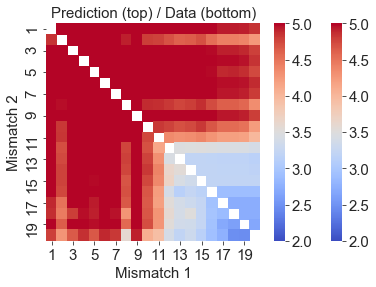

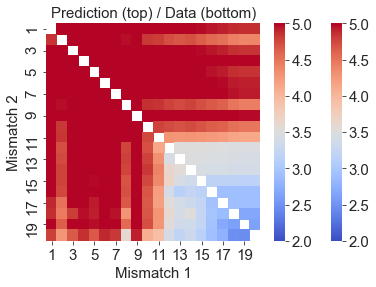

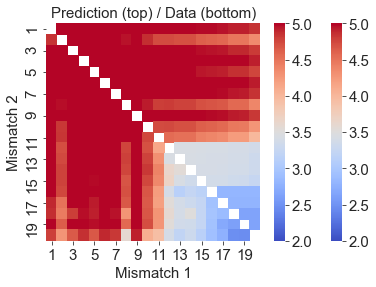

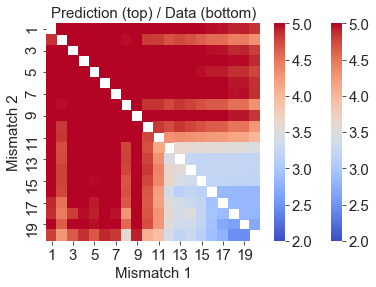

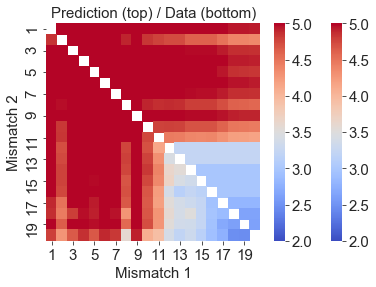

In [33]:
b=[]
for filename in not_selected:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    plt.figure()
    b.append(pltABA.predict_double_mm(parameters,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA))

In [34]:
parameters1 = plt_B.load_simm_anneal(not_selected[0], Nparams)
parameters1
epsC_fit_not=np.array(parameters1[:21]).copy()
epsC_fit_not[1:] *= -1

parameters2 = plt_B.load_simm_anneal(not_selected[1], Nparams)
parameters2
epsC_fit_not2=np.array(parameters2[:21]).copy()
epsC_fit_not2[1:] *= -1

parameters3 = plt_B.load_simm_anneal(not_selected[2], Nparams)
parameters3
epsC_fit_not3=np.array(parameters3[:21]).copy()
epsC_fit_not3[1:] *= -1

parameters4 = plt_B.load_simm_anneal(not_selected[3], Nparams)
parameters4
epsC_fit_not4=np.array(parameters4[:21]).copy()
epsC_fit_not4[1:] *= -1

parameters5 = plt_B.load_simm_anneal(not_selected[4], Nparams)
parameters5
epsC_fit_not5=np.array(parameters5[:21]).copy()
epsC_fit_not5[1:] *= -1

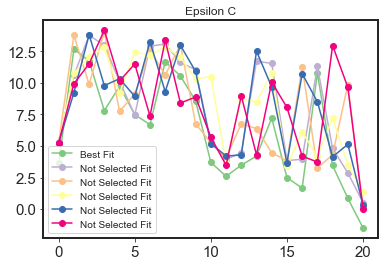

In [37]:
plt.plot(range(0,21),np.cumsum(epsC_fit),marker='o',label='Best Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not2),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not3),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not4),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not5),marker='o',label='Not Selected Fit')
plt.title('Epsilon C')
plt.legend()

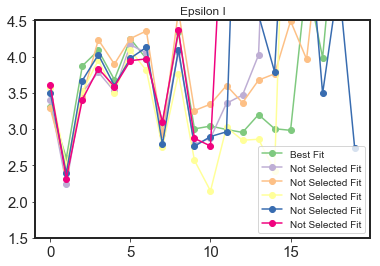

In [38]:
plt.plot(range(0,20),Param_conc3[21:],marker='o',label='Best Fit')
plt.plot(range(0,20),parameters1[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters2[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters3[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters4[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters5[21:],marker='o',label='Not Selected Fit')
plt.title('Epsilon I')
plt.ylim(1.5,4.5)
plt.legend()
# looks like after 12 it does something weird, is the same as we see in the double mismatch heatmaps.
# IT IS NOT ALLOWED TO BE NEGATIVE!!! Adjusted the lower bound in the pipeline!
# this hopefully results in more selected fits! since now it will not deviate in the end anymore.

(array([ 22.,  23., 227., 467.,  51.,  39.,  52.,  53.,  42.,  42.]),
 array([0.30254039, 1.26835339, 2.23416639, 3.19997939, 4.16579239,
        5.1316054 , 6.0974184 , 7.0632314 , 8.0290444 , 8.9948574 ,
        9.96067041]),
 <a list of 10 Patch objects>)

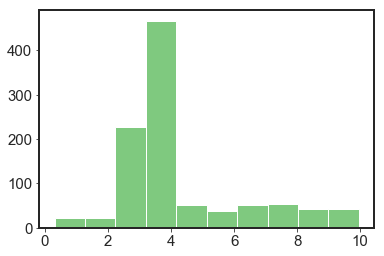

In [39]:
fit_process=sa = pd.read_csv(best_fit_conc3, delimiter='\t', index_col=43)
plt.hist(fit_process['Parameter 22'])